(b) Softmax classification: gradient descent (GD) In this part you will use soft-max to peform multi-class classification instead of distinct “one against all” detectors. The target vector [Y]l = 1 x is an “l” 0 else.
for l = 0, . . . , K − 1. You can alternatively consider a scalar output Y equal to the value in {0, 1, . . . , K − 1} corresponding to the class of input x. Construct a logistic classifier that uses K seperate linear weight vectors w0, w1, . . . , wK−1. Compute estimated probabilities for each class given input x and select the class with the largest score among your K predictors:
P [Y = l|x, w] = exp(wTlx)PK i=0 exp(wTi x) Yˆ = arg maxl P [Y = l|x, w].

Note that the probabilities sum to 1. Use log-loss and optimize with batch gradient descent. The (negative) likelihood function on an N sampling training set is: L(w) = −1NXN i=1 log Ph Y = y(i)|x(i), wi where the sum is over the N points in our training set.

In [ ]:
# Importing the necessary libraries. 
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Extracting the data from the file.
open_file = 'mnist_traindata.hdf5'
with h5py.File(open_file, 'r') as columns:
    file_datacols = np.array(columns)
    print(file_datacols)

['xdata' 'ydata']


In [ ]:
# Converting the data to an array.
open_file = 'mnist_traindata.hdf5' # Training dataset.
with h5py.File(open_file, 'r') as columns:
    xdata = np.float32(np.array(columns['xdata']))
    ydata = np.float32(np.array(columns['ydata']))
print('Dimensions of xdata: ', xdata.shape)
print('Dimensions of ydata: ', ydata.shape)

open_file = 'mnist_testdata.hdf5' # Testing dataset.
with h5py.File(open_file, 'r') as columns:
    xdatatest = np.float32(np.array(columns['xdata']))
    ydatatest = np.float32(np.array(columns['ydata']))

print("The dimensions of xdataset: ", xdatatest.shape)

Dimensions of xdata:  (60000, 784)
Dimensions of ydata:  (60000, 10)
The dimensions of xdataset:  (10000, 784)


In [ ]:
# Training the model.
# x -> xdata; y -> ydata; w -> weight; b -> bias; lamb -> lambda.
def train(x, y, w, b, lamb):
    samples, dataset = x.shape
    weights = np.zeros([10, 784])
    bias = np.zeros([10, 1])
    loss = 0.0
    accuracy = []
    
    for i in range(samples):
        xi = np.reshape(x[i], (784, 1))
        yi = y[i]
        prediction_10 = np.exp((np.matmul(w, xi) + b)).reshape([10,])
        d = np.float64(np.sum(prediction_10, axis = 0))
        frac = prediction_10 / d # Fraction part.
        
        for j in range(y.shape[1]):
            prediction = frac[j]
            if yi[j] > 0.0:
                weight_values = (1 - prediction) * xi
                bias_values = 1 - prediction
                loss = loss - np.log(prediction)
            else:
                weight_values = -prediction * xi
                bias_values = -prediction
            
            weights[j] -= weight_values[:, 0]
            bias[j] -= bias_values

        max_pred = np.argmax(prediction_10)
        max_y = np.argmax(yi)
        
        if max_pred == max_y:
            accuracy.append(1)
            
    loss_sum = loss / samples # Computing the loss.
    weights_sum = weights / samples
    bias_sum = bias / samples
    total_accuracy = np.sum(accuracy) / samples # Calculating the accuracy.

    for j in range(y.shape[1]):
        weights_sum[j] += lamb * np.sum(abs(w[j]))
    
    return weights_sum, bias_sum ,total_accuracy, loss_sum

# Testing the model.
# x -> xdata; y -> ydata; w -> weight; b -> bias.
def test(x, y, w, b):
    samples, dta = x.shape
    loss = 0.0
    accuracy = []
    
    for i in range(samples):
        xi = np.reshape(x[i], (784, 1))
        yi = y[i]
        prediction_10 = np.exp((np.matmul(w, xi) + b)).reshape([10,])
        d = np.float64(np.sum(prediction_10, axis = 0))
        frac = prediction_10 / d # Fraction part.
        
        for j in range(y.shape[1]):
            prediction = frac[j]
            if yi[j] > 0.0:
                loss -= np.log(prediction)

        max_pred = np.argmax(prediction_10)
        max_y = np.argmax(yi)
        if max_pred == max_y:
            accuracy.append(1)
            
    loss_sum = loss / samples # Computing the loss.
    total_accuracy = np.sum(accuracy) / samples # Calculating the accuracy.

    return total_accuracy, loss_sum    

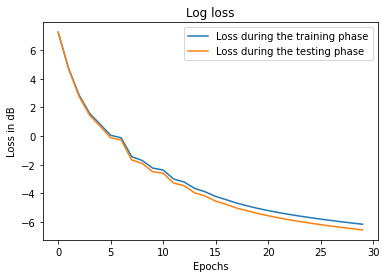

In [ ]:
w = np.zeros([10, 784]) # Resetting the weight values before the fucntion call.
b = np.zeros([10, 1]) # Resetting the bias values before the fucntion call.
test_loss = []
test_accuracy = []
train_loss = []
train_accuracy = []
lamb = 0 # Regularizer is not required as the model converges.
epoch = 30

for i in range(epoch):
    weights_sum, bias_sum, accuracy, loss_sum = train(xdata, ydata, w, b, lamb) # Function (train) call.
    train_accuracy.append(accuracy)
    train_loss.append(loss_sum)

    total_accuracy, total_loss = test(xdatatest, ydatatest, w, b) # Function (test) call. 
    test_accuracy.append(total_accuracy)
    test_loss.append(total_loss)
    
    w -= 0.65 * weights_sum # Chosen learning rate is 0.65
    b -= 0.65 * bias_sum

# Plotting the log loss graph.
plt.title("Log loss")
plt.xlabel("Epochs")
plt.ylabel("Loss in dB")
plt.plot(range(epoch), 20 * np.log10(train_loss), label = "Loss during the training phase")
plt.plot(range(epoch), 20 * np.log10(test_loss), label = "Loss during the testing phase")
plt.legend()
plt.show()

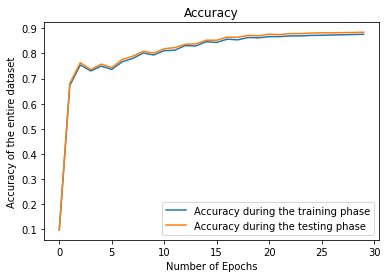

In [ ]:
# Plotting the accuracy graph.
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the entire dataset")
plt.plot(range(epoch), train_accuracy, label = "Accuracy during the training phase")
plt.plot(range(epoch), test_accuracy, label = "Accuracy during the testing phase")
plt.legend()
plt.show()

iii. Plot log-loss (i.e., learning curve) of the training set and test set on the same figure. On
a separate figure plot the accuracy against iteration number of your model on the training
set and test set. Plot each as a function of the iteration number.

In [ ]:
print("Final training loss: ", 20 * np.log10(train_loss[epoch - 1]), 'dB')
print("Final test loss: ", 20 * np.log10(test_loss[epoch - 1]), 'dB')
print("Final training accuracy: ", train_accuracy[epoch - 1] * 100, '%')
print("Final test accuracy: ", test_accuracy[epoch - 1] * 100, '%')

Final training loss:  -6.151673644809095 dB
Final test loss:  -6.548856860457139 dB
Final training accuracy:  87.60166666666666 %
Final test accuracy:  88.41 %


iv. Compute the final loss and final accuracy for both your training set and test set.

ii. Implement batch gradient descent. What learning rate did you use?

**Answer: -** I used 0.65 as the learning rate.